In [1]:
library(jsonlite)

In [2]:
metadata<-fromJSON("https://data.nasa.gov/data.json")

In [3]:
names(metadata$dataset)

[1] "_id"                "@type"              "accessLevel"       
 [4] "accrualPeriodicity" "bureauCode"         "contactPoint"      
 [7] "description"        "distribution"       "identifier"        
[10] "issued"             "keyword"            "landingPage"       
[13] "language"           "modified"           "programCode"       
[16] "publisher"          "spatial"            "temporal"          
[19] "theme"              "title"              "license"           
[22] "references"         "rights"             "describedBy"

In [4]:
library(ggplot2)
library(igraph)
library(ggraph)
library(magrittr)
library(dplyr)
library(tidytext)
library(widyr)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘dplyr’

The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
nasa_title<-data_frame(id=metadata$dataset$`_id`$`$oid`,
                       title=metadata$dataset$title)

In [6]:
nasa_title<-nasa_title %>%
      unnest_tokens(word,title) %>%
      anti_join(stop_words)

Joining, by = "word"


In [7]:
nasa_title %>%
    count(word,sort=TRUE)

word,n
project,7746
data,4543
1,4072
level,2797
global,2332
2,1972
daily,1770
v1.0,1758
3,1755
v1,1654


In [8]:
my_stopwords<-data_frame(word=c(as.character(1:10),
                                 "v1","v03","l2","l3","l4",
                                 "v5.2.0","v003","v004","v006","v7"))
nasa_title<-nasa_title %>%
     anti_join(my_stopwords)

Joining, by = "word"


In [9]:
title_word_pairs<-nasa_title %>%
     pairwise_count(word,id,sort=TRUE,upper=FALSE)

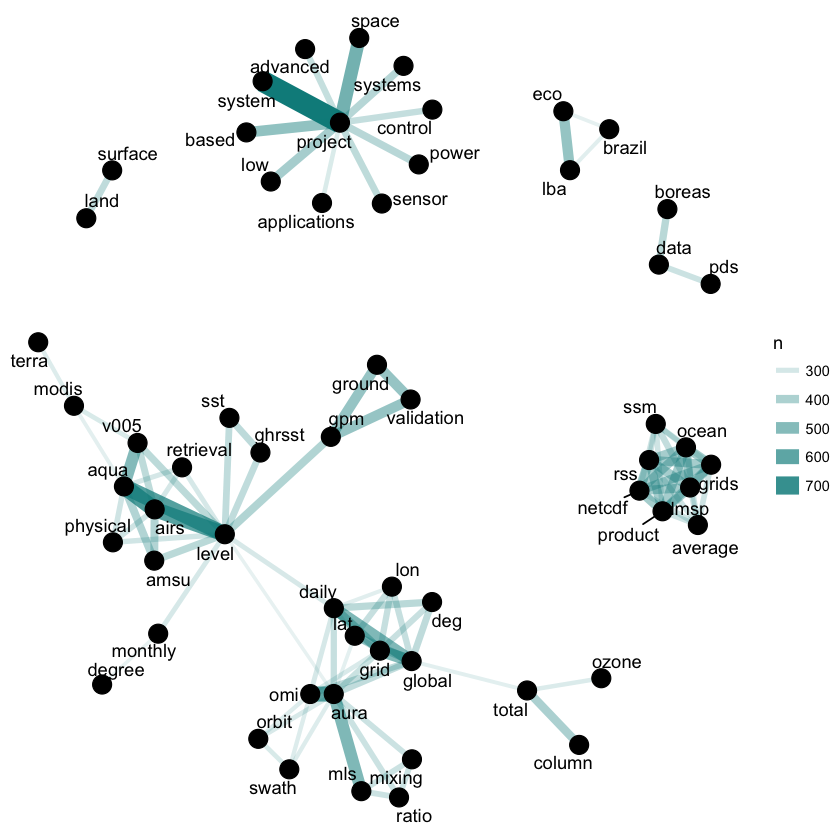

In [10]:
title_word_pairs %>%
    filter(n>=250) %>%
    graph_from_data_frame() %>%
    ggraph(layout="fr") +
    geom_edge_link(aes(edge_alpha = n, edge_width = n), edge_colour = "cyan4") +
    geom_node_point(size = 5) +
    geom_node_text(aes(label = name), repel = TRUE, 
                 point.padding = unit(0.2, "lines")) +
    theme_void()